# Many-armed bandits

## Import libraries and modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, log2

In [2]:
from arm.Bernoulli import Bernoulli

from algorithm.MOSS import MOSS, SubSampledMOSS
from algorithm.Greedy import Greedy, SubSampledGreedy
from algorithm.MeDZO import MeDZO_MAB, empMeDZO_MAB

from environment.MAB import MAB, EvaluationMAB

## Experimental setup

In [3]:
np.random.seed(1234)

nb_rep = 10
scenario = 1

if scenario == 1:
    K = 2000
    horizon = 5000
    
    alpha = 0.4
    m = ceil(K / horizon**alpha)
    means = [0.9] * m
    temp = (K - m) // 5
    means += [0.5, 0.4, 0.3, 0.2, 0.1] * temp
    for i in range(K - len(means)):
        means += [np.random.choice([0.5, 0.4, 0.3, 0.2, 0.1])]
    np.random.shuffle(means)
    env = MAB([Bernoulli(p) for p in means])

## Compare various algorithms

In [4]:
algorithms = [MOSS(K, horizon, c=1), 
              SubSampledMOSS(K, ceil(horizon**alpha * np.log(np.sqrt(horizon))), horizon, c=1),  
              Greedy(K),
              #SubSampledGreedy(K, ceil(((1-alpha)*horizon**(1+alpha)*np.log(horizon)/8)**(1/2)))]
              SubSampledGreedy(K, ceil((1-2*alpha)*horizon**(2*alpha)*np.log(horizon)/(4)))]#,
              #MeDZO_MAB(K, horizon, c=1), 
              #empMeDZO_MAB(K, horizon, c=1)]

Start evaluation of MOSS
0
1
2
3
4
5
6
7
8
9
Regret of MOSS : 2450.2299999999545 +- 61.74528403045136 

Start evaluation of SubSampledMOSS
0
1
2
3
4
5
6
7
8
9
Regret of SubSampledMOSS : 470.7399999997133 +- 14.967645105361285 

Start evaluation of Greedy
0
1
2
3
4
5
6
7
8
9
Regret of Greedy : 1634.3399999998292 +- 17.360195851432422 

Start evaluation of SubSampledGreedy
0
1
2
3
4
5
6
7
8
9
Regret of SubSampledGreedy : 318.02999999974327 +- 11.89521332300865 



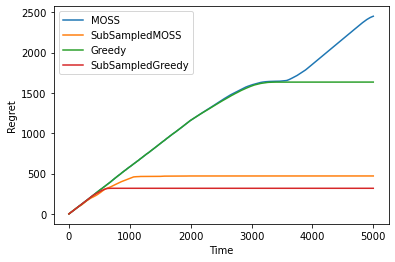

In [5]:
plt.figure()

for algo in algorithms:
    print('Start evaluation of', algo.__class__.__name__)
    ev = EvaluationMAB(env, algo, nb_rep, horizon)
    mean_regret = ev.mean_regret()
    std_regret = ev.std_regret()
    print('Regret of', algo.__class__.__name__, ':', mean_regret[-1], '+-', std_regret[-1], '\n')
    
    
    plt.plot(ev.tsav, mean_regret)
    #plt.fill_between(ev.tsav, mean_regret-std_regret, mean_regret+std_regret, alpha=.2)
    plt.xlabel('Time')
    plt.ylabel('Regret')

plt.legend([algo.__class__.__name__ for algo in algorithms], loc=0)
plt.show()